# Purpose:
The purpose of this notebook is to create a SLR ANN model using PyTorch and to plot the training losses and model predictions.

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

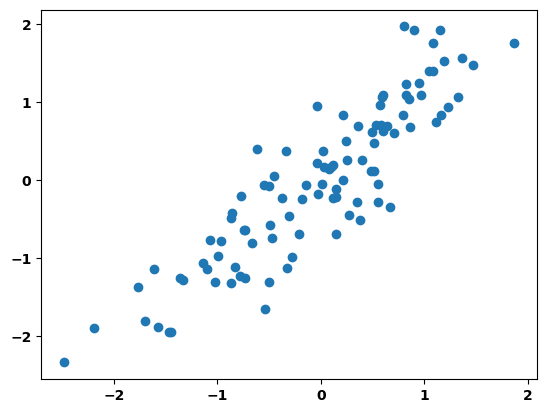

In [2]:
# creating toy data for a simple linear regression model

N = 100
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2 # adding some noise

plt.scatter(x,y)

In [3]:
# creating an ANN

ANN_reg = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(), # not necessary for this data since it is linear 
    nn.Linear(1,1)
)

ANN_reg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [4]:
# creating a learning rate, loss function, and optimizer

lr = 0.01

loss_fn = nn.MSELoss()

opti = torch.optim.SGD(ANN_reg.parameters(), lr=lr)

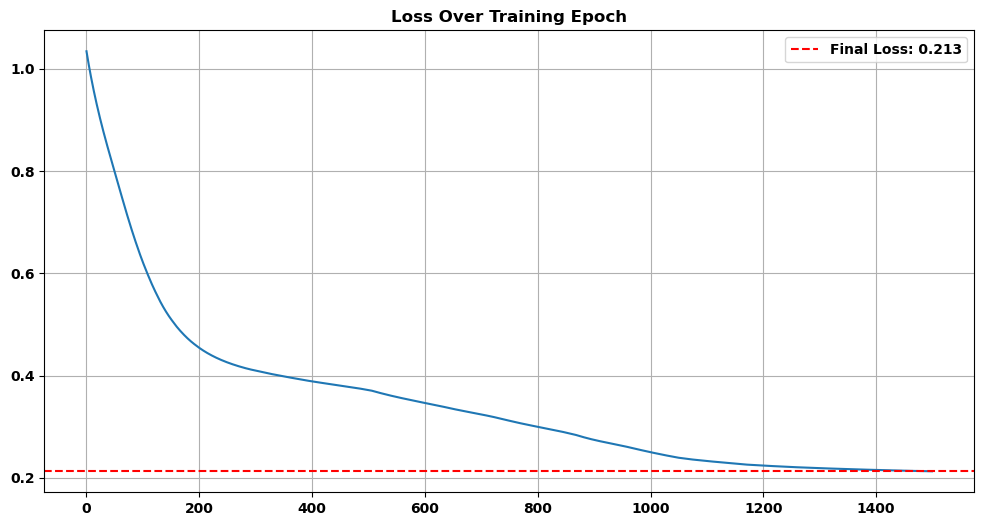

In [5]:
# training loop

epochs = 1500 
losses = torch.zeros(epochs) # a list to store losses

for epoch in range(epochs):
    y_pred = ANN_reg(x) # predictions
    
    loss = loss_fn(y_pred, y) # loss at current parameter values
    losses[epoch] = loss # updating the loss list at each epoch
    
    opti.zero_grad() # zeroing grads since they accumulate
    loss.backward() # computing the gradients/backprop
    opti.step() # optimize ANN parameters
    
# plotting the loss value at each epoach and noting the final loss value
plt.figure(figsize=(12,6))
plt.plot(range(epochs),losses.detach().numpy())
plt.title('Loss Over Training Epoch')
plt.axhline(losses[-1].item(), c='r', ls='--', label=f'Final Loss: {losses[-1].item():.3f}')
plt.grid()
plt.legend()

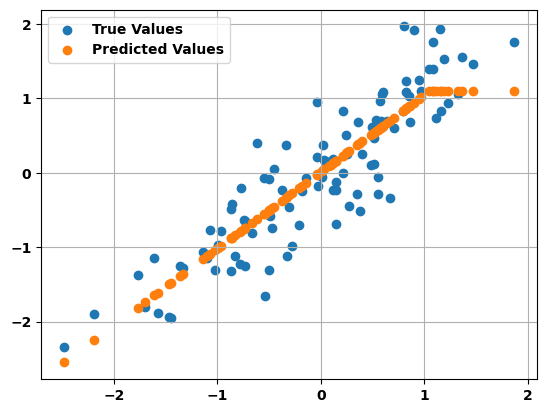

In [6]:
# scatter plot for the true y values and predicted y values

preds = ANN_reg(x)

plt.scatter(x,y, label='True Values')
plt.scatter(x,preds.detach().numpy(), label='Predicted Values')
plt.grid()
plt.legend()